In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/Datos Python/Inseguridad ciudadana'

Mounted at /content/drive
/content/drive/MyDrive/Datos Python/Inseguridad ciudadana


In [ ]:
# Leer el archivo
delitos = pd.read_excel('Base de datos de SIDPOL a febrero 2024_reporte.xlsx', sheet_name='Temp4')

In [ ]:
delitos.rename(columns={'ANIO':'Año','MES':'Mes','DPTO_HECHO_NEW':'Región','PMODALIDADES':'Modalidad','n_dist_ID_DGC':'Cantidad'}, inplace=True)

In [ ]:
delitos.head()

,Año,Mes,Región,Modalidad,Cantidad
0,2018,1,AMAZONAS,Extorsión,2
1,2018,1,AMAZONAS,Homicidio,4
2,2018,1,AMAZONAS,Hurto agravado,37
3,2018,1,AMAZONAS,Otros,341
4,2018,1,AMAZONAS,Robo,27


In [ ]:
delitos.to_excel('delitos')

Relacionar amenazas o cupos con inseguridad ciudadana por región y desarrollo de las regiones. \
Hacer una serie de #robos, #extorsiones por año y región.

**Usaré datos entre marzo 2018 y marzo 2024**

In [ ]:
# Creo una columna de Fecha
delitos['Fecha'] = delitos['Año'].astype(str)+'-'+delitos['Mes'].astype(str)+'-1'
delitos['Fecha'] = pd.to_datetime(delitos['Fecha'],format='%Y-%m-%d')

In [ ]:
# Elimino las observaciones anteriores a marzo 2018
delitos = delitos[delitos['Fecha']>='2018-03-01']

In [ ]:
top_modalidades = delitos.groupby('Modalidad')['Cantidad'].sum().sort_values(ascending=False)
top_modalidades =pd.DataFrame(top_modalidades).reset_index()

In [ ]:
top_modalidades

,Modalidad,Cantidad
0,Otros,1746155
1,Robo,572923
2,Hurto agravado,293993
3,Violación de la libertad sexual,142631
4,Extorsión,54495
5,Homicidio,26549
6,Tráfico ilícito de drogas,18530
7,Fabricación de armas y explosivos,10581
8,Secuestro,9278
9,Corrupción,1328


In [ ]:
lista_paletas = ['bone','crest','ocean','mako','gistgray','YlGnBu','RdBu']

<ipython-input-115-3b294e4c2d94>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=delitos,x='Modalidad',y='Cantidad',order=top_modalidades['Modalidad'],palette='crest',errorbar=None)


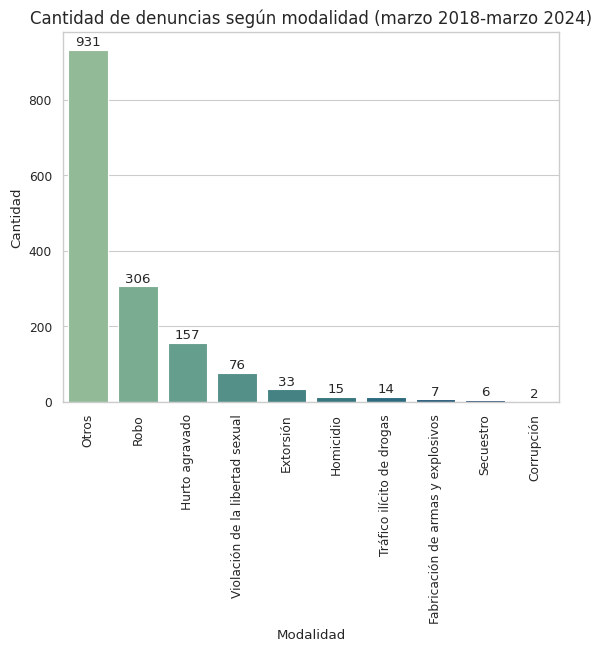

In [ ]:
# Cantidad de delitos según modalidad (marzo 2018-marzo 2024)

# Estilo
sns.set_context('paper')
sns.set_style('whitegrid')
# Gráfico
ax = sns.barplot(data=delitos,x='Modalidad',y='Cantidad',order=top_modalidades['Modalidad'],palette='crest',errorbar=None)
# Añadir las cantidades encima del gráfico
for p in ax.patches:
  texto_a_mostrar = f'{p.get_height():.0f}'
  coords = (p.get_x() + p.get_width() / 2., p.get_height())
  ax.annotate(texto_a_mostrar,
              coords,
              ha='center', # centra el texto en las coordenadas
              xytext=(0, 3), # colocar el texto en las coordenadas (0,5), donde textcoords determina el sistema de coordenadas
              textcoords='offset points') # Desalinear (0,5) de las coordenadas (dadas por coords)
# Rotación de las etiquetas en el eje x
plt.xticks(rotation=90)
plt.title('Cantidad de denuncias según modalidad (marzo 2018-marzo 2024)',fontsize=12)

plt.show()

In [ ]:
# Cantidad de delitos según región y año (parte 1)
condicion_1 = (delitos['Fecha']>='2023-01-01') & (delitos['Fecha']<='2023-03-01') # Entre enero y marzo de 2023
condicion_2 = (delitos['Fecha']>='2024-01-01') & (delitos['Fecha']<='2024-03-01') # Entre enero y marzo de 2024
top_2023_2024_por_region = pd.DataFrame(delitos[condicion_1 | condicion_2].groupby('Región')['Cantidad'].sum().sort_values(ascending=False)).reset_index()
top_2023_2024_por_region.head(10)

,Región,Cantidad
0,LIMA METROPOLITANA,97548
1,LAMBAYEQUE,17514
2,LA LIBERTAD,15632
3,AREQUIPA,15480
4,PIURA,13900
5,JUNIN,11795
6,PROV. CONST. DEL CALLAO,9452
7,ICA,8315
8,CUSCO,7893
9,REGION LIMA,7758


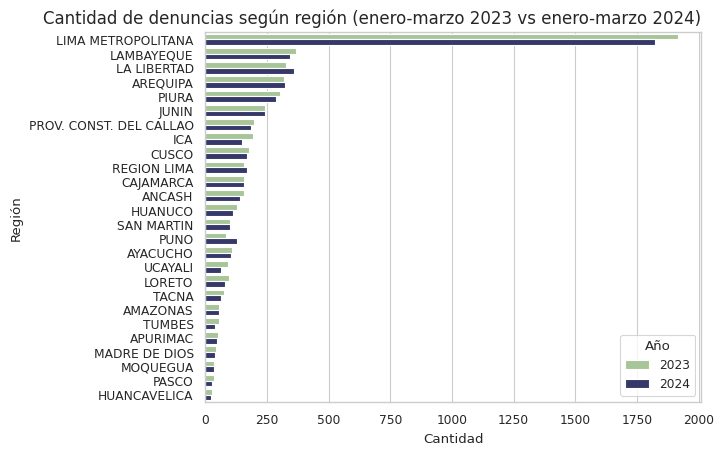

In [ ]:
# Cantidad de delitos según región y año (parte 2)
sns.barplot(data=delitos[condicion_1 | condicion_2],
            y='Región',
            x='Cantidad',
            hue='Año',
            errorbar=None,
            palette='crest',
            order=top_2023_2024_por_region['Región'])
plt.title('Cantidad de denuncias según región (enero-marzo 2023 vs enero-marzo 2024)',fontsize=12,loc='right')
plt.show()

In [ ]:
# Delitos de extorsión según región (parte 1)
delitos_extorsion = delitos[delitos['Modalidad']=='Extorsión']
delitos_extorsion = pd.DataFrame(delitos_extorsion.groupby(['Región','Año'])['Cantidad'].sum().reset_index())
top_regiones = pd.DataFrame(delitos_extorsion.groupby(['Región'])['Cantidad'].sum().reset_index())
top_regiones = top_regiones.sort_values(by='Cantidad',ascending=False)
top_regiones.head(10)

,Región,Cantidad
13,LIMA METROPOLITANA,21928
11,LA LIBERTAD,9686
18,PIURA,4488
21,REGION LIMA,2921
19,PROV. CONST. DEL CALLAO,1921
12,LAMBAYEQUE,1898
9,ICA,1757
1,ANCASH,1609
3,AREQUIPA,1152
10,JUNIN,957


In [ ]:
# Juntando Lima y Callao
delitos_extorsion = delitos_extorsion.replace({'LIMA METROPOLITANA':'LIMA Y CALLAO','REGION LIMA':'LIMA Y CALLAO','PROV. CONST. DEL CALLAO':'LIMA Y CALLAO'})

<Figure size 640x480 with 0 Axes>

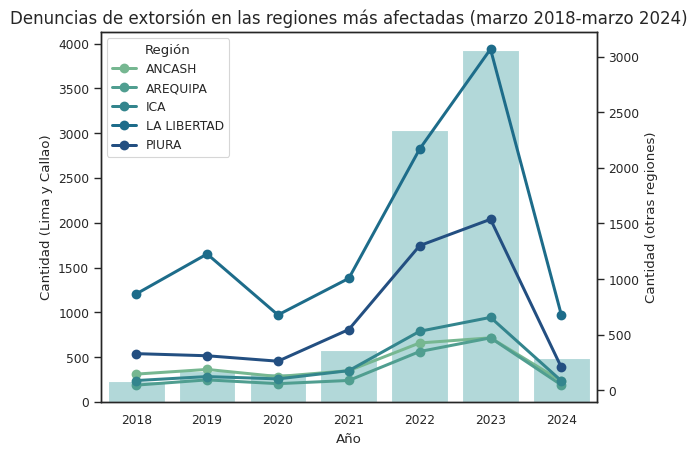

In [ ]:
# Delitos de extorsión según región (parte 2)
plt.clf()
sns.set_style('white')
fig, ax1 = plt.subplots()

# Primer gráfico
sns.barplot(data=pd.DataFrame(delitos_extorsion[delitos_extorsion['Región']=='LIMA Y CALLAO']),
            x='Año',
            y='Cantidad',
            errorbar=None,
            color='#abdee0',
            ax=ax1)
ax1.set_ylabel('Cantidad (Lima y Callao)')

# Segundo gráfico
ax2 = ax1.twinx()
sns.pointplot(data=pd.DataFrame(delitos_extorsion[delitos_extorsion['Región'].isin(['LA LIBERTAD','PIURA','LAMBAYAQUE','ICA','ANCASH','AREQUIPA'])]),
             x='Año',
             y='Cantidad',
             hue='Región',
             errorbar=None,
             palette='crest',
             ax=ax2)
ax2.set_ylabel('Cantidad (otras regiones)')

plt.title('Denuncias de extorsión en las regiones más afectadas (marzo 2018-marzo 2024)',fontsize=12)
plt.show()

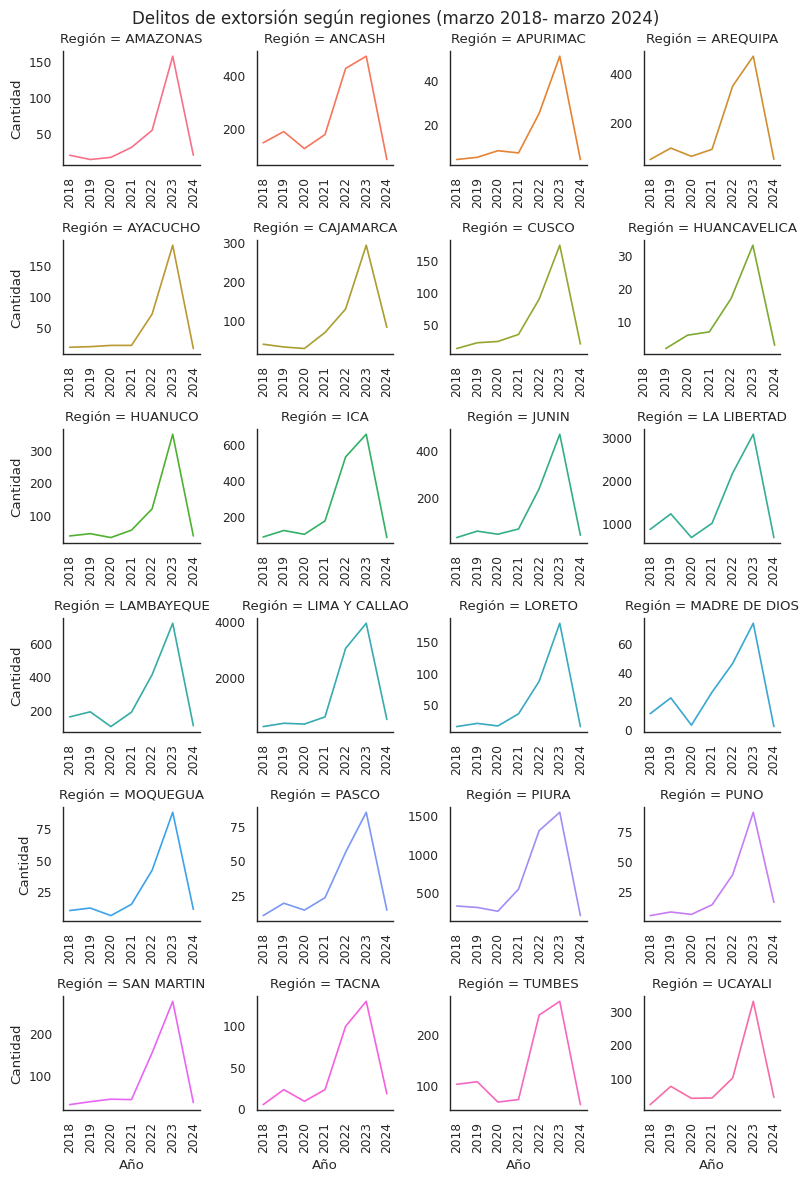

In [ ]:
# Delitos de extorsión según regiones

sns.set_style('white')

# Crear un FacetGrid para dibujar cada región por separado
grid = sns.FacetGrid(delitos_extorsion, col="Región", col_wrap=4, hue="Región", height=2, sharey=False, sharex=False)

# Gráfico para las regiones
grid.map(sns.lineplot, "Año", "Cantidad", errorbar=None)
grid.set(xticks=[x for x in range(2018,2025)])
grid.set_xticklabels([x for x in range(2018,2025)],rotation=90)
grid.fig.suptitle('Delitos de extorsión según regiones (marzo 2018- marzo 2024)',fontsize=12)

# Ajustar el lienzo
plt.tight_layout()
plt.show()